In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
titanic = pd.read_csv("C:/Users/hp/Downloads/train.csv")

In [53]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
d=['PassengerId','Pclass','Name','Age','SibSp','Parch','Fare']
titanic.drop(d,axis=1,inplace=True)

In [78]:
titanic.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,cabin_end
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived     891 non-null int64
Sex          891 non-null object
Ticket       891 non-null object
Cabin        204 non-null object
Embarked     889 non-null object
cabin_end    891 non-null int32
dtypes: int32(1), int64(1), object(4)
memory usage: 38.4+ KB


In [69]:
titanic.groupby(titanic['Cabin'].isnull()).mean()         #over 66% people survived with non-missing cabin,over 29% sur with msg
                                                          #this method is applied where survived=1,result is based on survived

,Survived,cabin_end
Cabin,,
False,0.666667,1
True,0.299854,0


In [70]:
titanic['cabin_end'] = np.where(titanic['Cabin'].isnull(),0,1)

In [71]:
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked,cabin_end
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0


In [72]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

'1.It is observed that people having assigned cabin are more likely to survive\n   2.It is possible that S board could have more males or less cabin assinged people than C board\n   3.It is observed that more females are survived than males\n'

<Figure size 432x288 with 0 Axes>

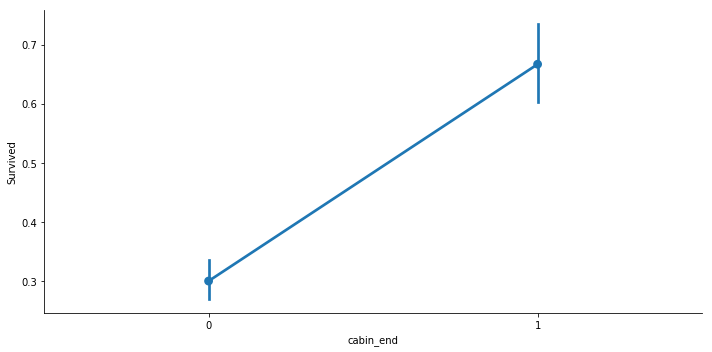

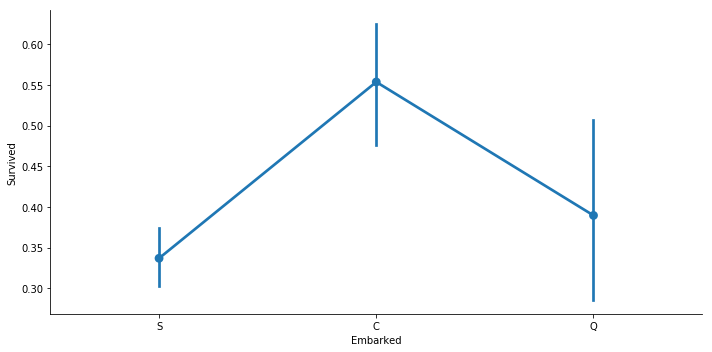

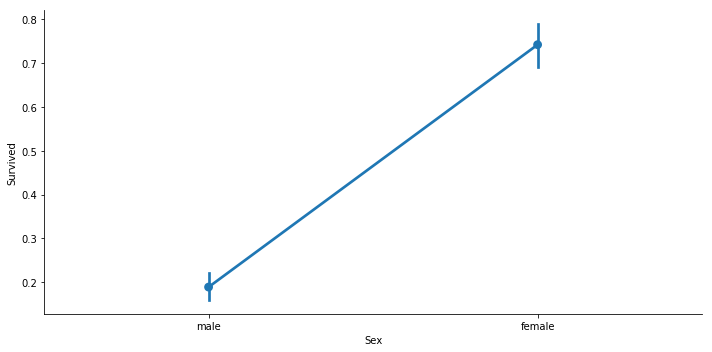

In [73]:
for index,col in enumerate(['cabin_end','Embarked','Sex']):
    plt.figure(index)
    sns.catplot(x=col,y='Survived',data = titanic,kind='point',aspect=2)
'''1.It is observed that people having assigned cabin are more likely to survive
   2.It is possible that S board could have more males or less cabin assinged people than C board
   3.It is observed that more females are survived than males
'''

In [74]:
#The hypothesis C board people survived more than S board can be solved by going through different parameter 
#pivot table can be used to explore different features

In [75]:
titanic.pivot_table('Survived',index='Sex',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [76]:
titanic.pivot_table('Survived',index='cabin_end',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
cabin_end,,,
0,99,73,515
1,69,4,129


In [77]:
'''It is observed that the people of C board is more likely to survived beacause their are more number of females and
 more assigned cabins than S board and we have already determined that more females had survived and more assigned cabin 
 people had survived '''

'It is observed that the people of C board is more likely to survived beacause their are more number of females and\n more assigned cabins than S board and we have already determined that more females had survived and more assigned cabin \n people had survived '

In [ ]:
print('features ')